In [3]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

In [4]:
# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Load summary tables

In [5]:
br_df = pd.read_csv("../summary_tables/2020-04-28_br-corr.csv")
gamma_df = pd.read_csv("../summary_tables/2020-04-29_gamma-corr.csv")
nv_df = pd.read_csv("../summary_tables/2020-04-29_nv-corr.csv")

# Restrict to equilibrium epoch
br_df = br_df.query("epoch == 'InitVar'")
gamma_df = gamma_df.query("epoch == 'InitVar'")
nv_df = nv_df.query("epoch == 'InitVar'")

# Remove E[X_h] <= 0.2; as there is considerable extinction here
br_df = br_df.query("HX_expected > 0.21")
gamma_df = gamma_df.query("HX_expected > 0.21")
nv_df = br_df.query("HX_expected > 0.21")

## Visualise expected vs observed prevalence

Text(0.5, 1.0, 'Number of Vectors ($N_v$)')

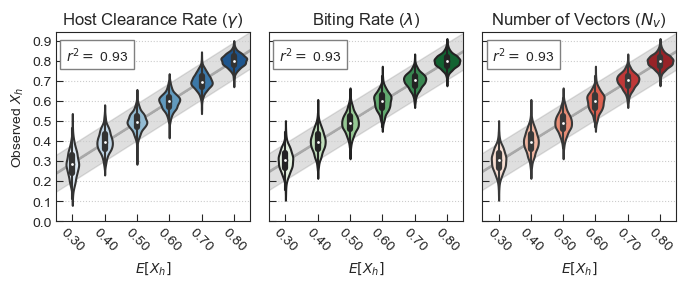

In [33]:
n_expts = 3

fig, ax = plt.subplots(n_view_metrics, n_expts, figsize=(8, 2.5), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# violinplots
regress_violinplot("HX", "HX_expected", gamma_df, ax[0], palette="Blues")
regress_violinplot("HX", "HX_expected", br_df, ax[1], palette="Greens")
regress_violinplot("HX", "HX_expected", nv_df, ax[2], palette="Reds")

for i in np.arange(3):    
    # Ticks & Grid
    ax[i].set_yticks(np.arange(0, 1, 0.1))
    ax[i].tick_params(axis='both', which='major', direction='in', length=5)
    ax[i].grid(axis='y', linestyle='dotted')
    
    # Labels
    ax[i].set_ylabel("")
    if i == 0: 
        ax[i].set_ylabel("Observed $X_h$")
    ax[i].set_xlabel("$E[X_h]$")
    ax[i].set_xticklabels(["%.02f" % float(f.get_text()) 
                           for f in ax[i].get_xticklabels()],
                          rotation=-45)
    

ax[0].set_title("Host Clearance Rate ($\gamma$)")
ax[1].set_title("Biting Rate ($\lambda$)")
ax[2].set_title("Number of Vectors ($N_v$)")

"We confirmed that across all epidemiological parameters are prevalence values our simulations equilibrated to the expected host prevalence."